In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io
import sklearn
import sklearn.datasets

In [15]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s


In [16]:
def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [17]:
def load_params_and_grads(seed=1):
    np.random.seed(seed)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    return W1, b1, W2, b2, dW1, db1, dW2, db2

In [18]:
W1, b1, W2, b2, dW1, db1, dW2, db2=load_params_and_grads(seed=1)

In [23]:
print('W1 = ',W1,end='\n \n')
print('b1 = ',b1,end='\n \n')
print('W2 = ',W2,end='\n \n')
print('b2 = ',b2,end='\n \n')
print('dW1 = ',dW1,end='\n \n')
print('db1 = ',db1,end='\n \n')
print('dW2 = ',dW2,end='\n \n')
print('db2 = ',db2,end='\n \n')

W1 =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
 
b1 =  [[ 1.74481176]
 [-0.7612069 ]]
 
W2 =  [[ 0.3190391  -0.24937038  1.46210794]
 [-2.06014071 -0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127 -0.17242821]]
 
b2 =  [[-0.87785842]
 [ 0.04221375]
 [ 0.58281521]]
 
dW1 =  [[-1.10061918  1.14472371  0.90159072]
 [ 0.50249434  0.90085595 -0.68372786]]
 
db1 =  [[-0.12289023]
 [-0.93576943]]
 
dW2 =  [[-0.26788808  0.53035547 -0.69166075]
 [-0.39675353 -0.6871727  -0.84520564]
 [-0.67124613 -0.0126646  -1.11731035]]
 
db2 =  [[0.2344157 ]
 [1.65980218]
 [0.74204416]]
 


In [25]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    ''''''''''The "Planar Data classification model" is a neural network model used for classifying data that lies 
    in a two-dimensional plane. The layer_dims variable is a list that specifies the number of neurons in each layer 
    of the neural network. In this specific example, the layer_dims list has three elements: [2, 2, 1].
    
        The first element of the layer_dims list, 2, specifies the number of neurons in the input layer. 
    The second element, 2, specifies the number of neurons in the hidden layer. 
    The third and final element, 1, specifies the number of neurons in the output layer.
    
        The neural network has two hidden layers, with the first hidden layer having two neurons and 
    the second hidden layer having one neuron. The input layer has two neurons, which corresponds to 
    the number of features in the input data. The output layer has one neuron, which produces a single 
    output value that represents the classification result for the input data.
    
        The shape of the weight matrix and bias vector for each layer is determined by the number 
    of neurons in the current layer and the number of neurons in the previous layer. For example, W1 has a 
    shape of (2, 2), because there are 2 neurons in the input layer and 2 neurons in the first hidden layer. 
    Similarly, b1 has a shape of (1, 2), because there is only one bias term for each of the 2 neurons in
    the first hidden layer.
    
        W2 has a shape of (2, 1), because there are 2 neurons in the first hidden layer and 1 neuron in the 
    second hidden layer. b2 has a shape of (1, 1), because there is only one bias term for the single neuron 
    in the output layer.
    
        This generalization can be extended to neural networks with any number of layers and neurons 
    in each layer, by specifying the layer_dims list accordingly.''''''''''
    
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert(parameters['W' + str(l)].shape == layer_dims[l], 1)
        
    return parameters

<>:53: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:53: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30697/175792405.py:53: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30697/175792405.py:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


# 1. Binary Classification Loss Functions
Binary Cross-Entropy

Hinge Loss

Squared Hinge Loss


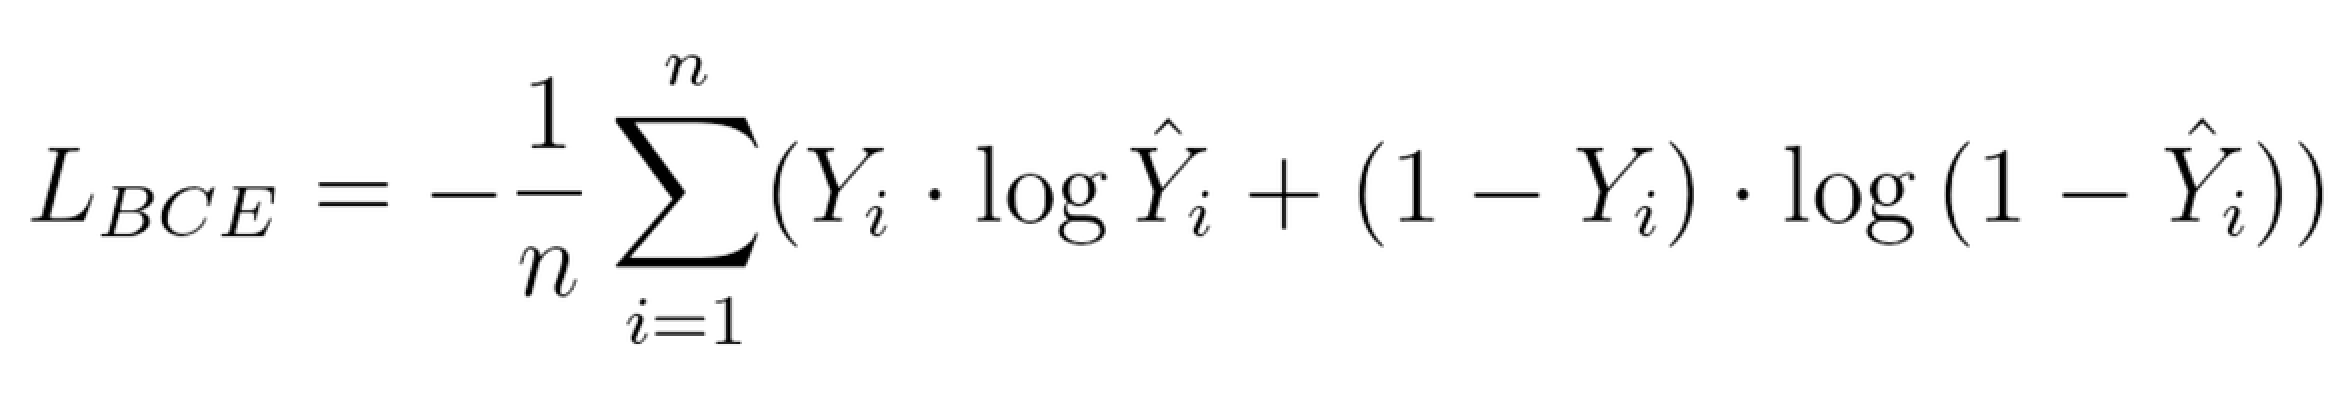

In [26]:
# Binary Cross-Entropy
def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    #The function first calculates the number of examples, "m", by taking the number of columns in the "Y" matrix.
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

# 2. Multi-Class Classification Loss Functions
Multi-Class Cross-Entropy Loss

Sparse Multiclass Cross-Entropy Loss

Kullback Leibler Divergence Loss

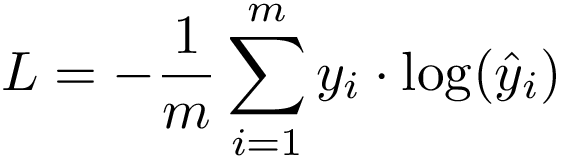

In [28]:
#Multi-Class Cross-Entropy Loss
def compute_cost_multiclass(AL, Y):
    """
    Compute the multi-class cross-entropy loss for a given set of predicted values and true labels.
    
    Arguments:
    AL -- a numpy array of shape (number of classes, number of examples), representing the predicted class probabilities for each example
    Y -- a numpy array of shape (number of classes, number of examples), representing the true labels for each example
    
    Returns:
    cost -- the cross-entropy loss value
    """
    m = Y.shape[1]  # number of examples
    
    # Calculate the cross-entropy loss
    logprobs = np.multiply(-np.log(AL), Y)
    cost = np.sum(logprobs) / m
    
    return cost

In [ ]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache



In [ ]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients


In [ ]:

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p


In [ ]:
def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y


In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()
    

In [ ]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions


In [ ]:
def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    return train_X, train_Y